In [1]:
# Choosing dataset that is reasonably small and low in features.
# Contains categorical features and is binary classification
# Has imbalance data set

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations, product

import matplotlib.pyplot as plt 

from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_validate

from ucimlrepo import fetch_ucirepo 

from utils import get_data, get_df_details, plot_distrb

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [3]:
X, y, metadata, variables = get_data('census_income')

In [4]:
X.shape

(48842, 14)

In [5]:
# Replace ? with np.nan
X.replace({'workclass': {'?': np.nan},
           'occupation': {'?': np.nan},
           'native-country': {'?': np.nan}}, 
           inplace=True)

In [6]:

r, _ = np.where(pd.isnull(X))

idx = [i for i in range(X.shape[0]) if i not in r]
X = X.iloc[idx, :]
y = y.iloc[idx, :]

In [7]:
X_summary = get_df_details(X)
X_summary.merge(variables.set_index('name'), how='outer', left_index=True, right_index=True)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nunique,n_nulls,dtype,role,type,demographic,description,units,missing_values
age,45222.0,NaN,NaN,NaN,38.547941,13.21787,17.0,28.0,37.0,47.0,90.0,74.0,0.0,int64,Feature,Integer,Age,N/A,None,no
capital-gain,45222.0,NaN,NaN,NaN,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0,121.0,0.0,int64,Feature,Integer,None,None,None,no
capital-loss,45222.0,NaN,NaN,NaN,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0,97.0,0.0,int64,Feature,Integer,None,None,None,no
education,45222,16,HS-grad,14783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.0,object,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
education-num,45222.0,NaN,NaN,NaN,10.11846,2.552881,1.0,9.0,10.0,13.0,16.0,16.0,0.0,int64,Feature,Integer,Education Level,None,None,no
fnlwgt,45222.0,NaN,NaN,NaN,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0,26741.0,0.0,int64,Feature,Integer,None,None,None,no
hours-per-week,45222.0,NaN,NaN,NaN,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0,96.0,0.0,int64,Feature,Integer,None,None,None,no
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Target,Binary,Income,">50K, <=50K.",None,no
marital-status,45222,7,Married-civ-spouse,21055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,object,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
native-country,45222,41,United-States,41292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,0.0,object,Feature,Categorical,Other,"United-States, Cambodia, England, Puerto-Rico,...",None,yes


In [8]:
idx = variables['type'].isin(['Integer', 'Continuous'])
num_cols = variables.loc[idx, 'name']
num_cols = num_cols.loc[~num_cols.isin(y.columns.tolist())]
num_cols

0                age
2             fnlwgt
4      education-num
10      capital-gain
11      capital-loss
12    hours-per-week
Name: name, dtype: object

In [9]:
idx = variables['type'].isin(['Categorical', 'Binary'])
cat_cols = variables.loc[idx, 'name']

cat_cols = cat_cols.loc[~cat_cols.isin(y.columns)]
cat_cols

1          workclass
3          education
5     marital-status
6         occupation
7       relationship
8               race
9                sex
13    native-country
Name: name, dtype: object

<Axes: title={'center': 'Census Income'}, xlabel='Income', ylabel='%'>

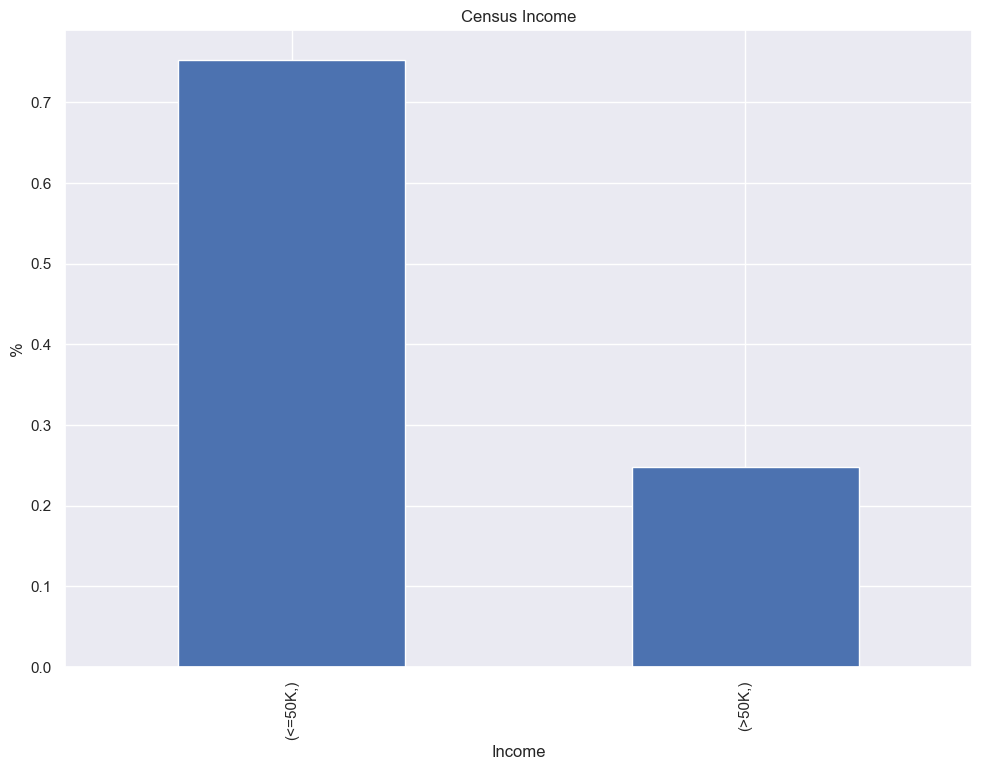

In [10]:
y.replace({'<=50K.': '<=50K', '>50K.': '>50K'}).value_counts(normalize=True).plot(kind='bar', title='Census Income', xlabel='Income', ylabel='%')

# EDA - on the FULL data set
1. For the binary value to a % plot of distribution - note the ones that are very skewed
2. For the continuous data - do a violin plot distribution  - do we need normalisation here?
3. Do a correlation plot o

In [11]:

X_eda = X.copy()

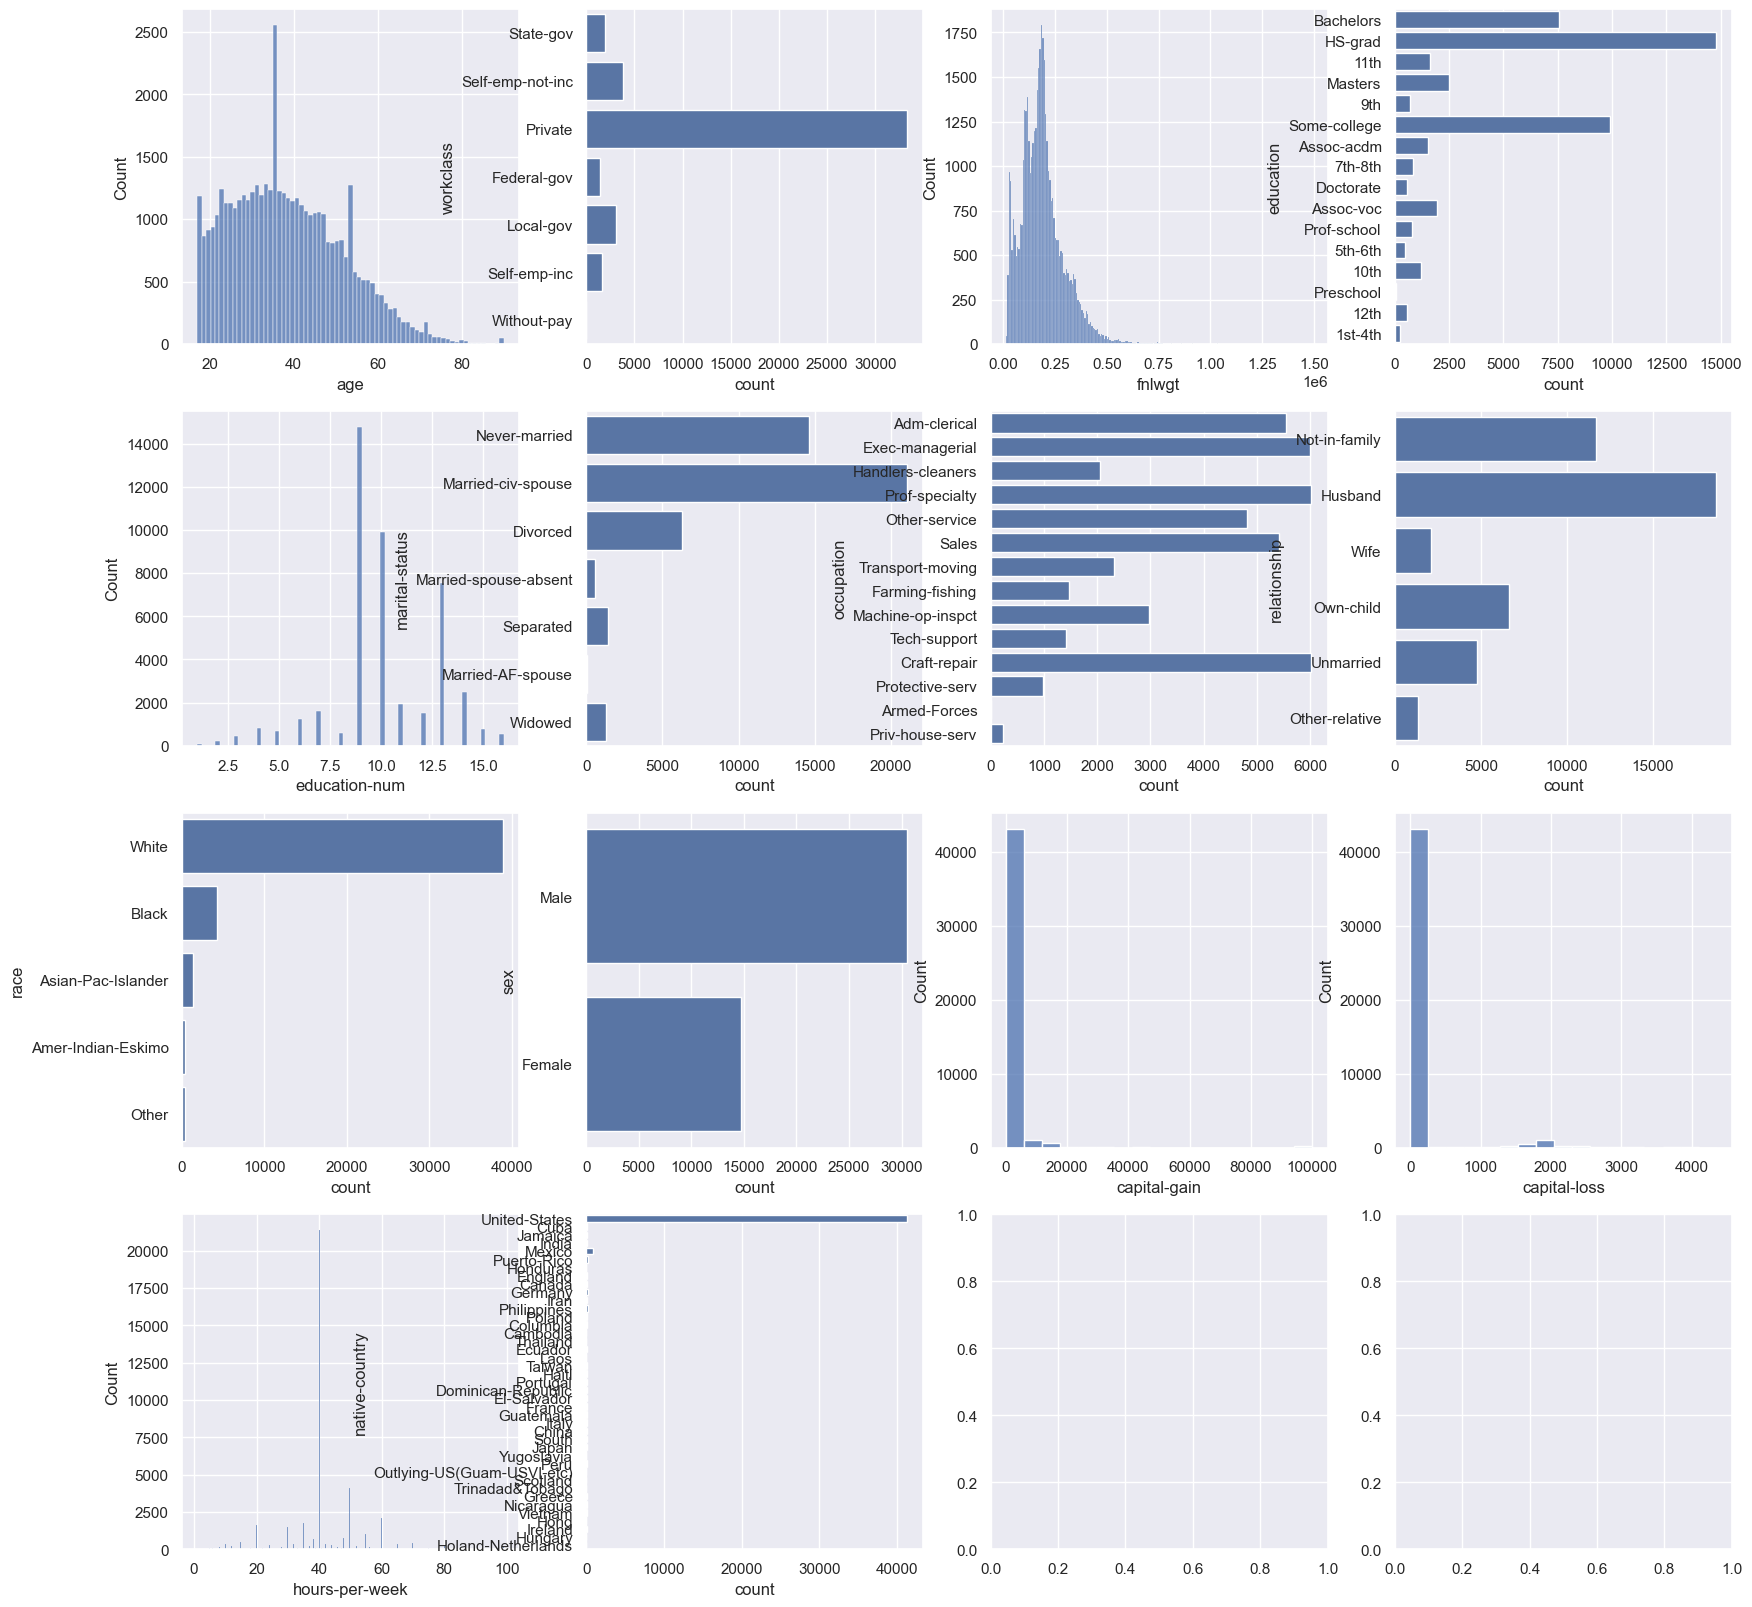

In [15]:
plot_distrb(X_eda)

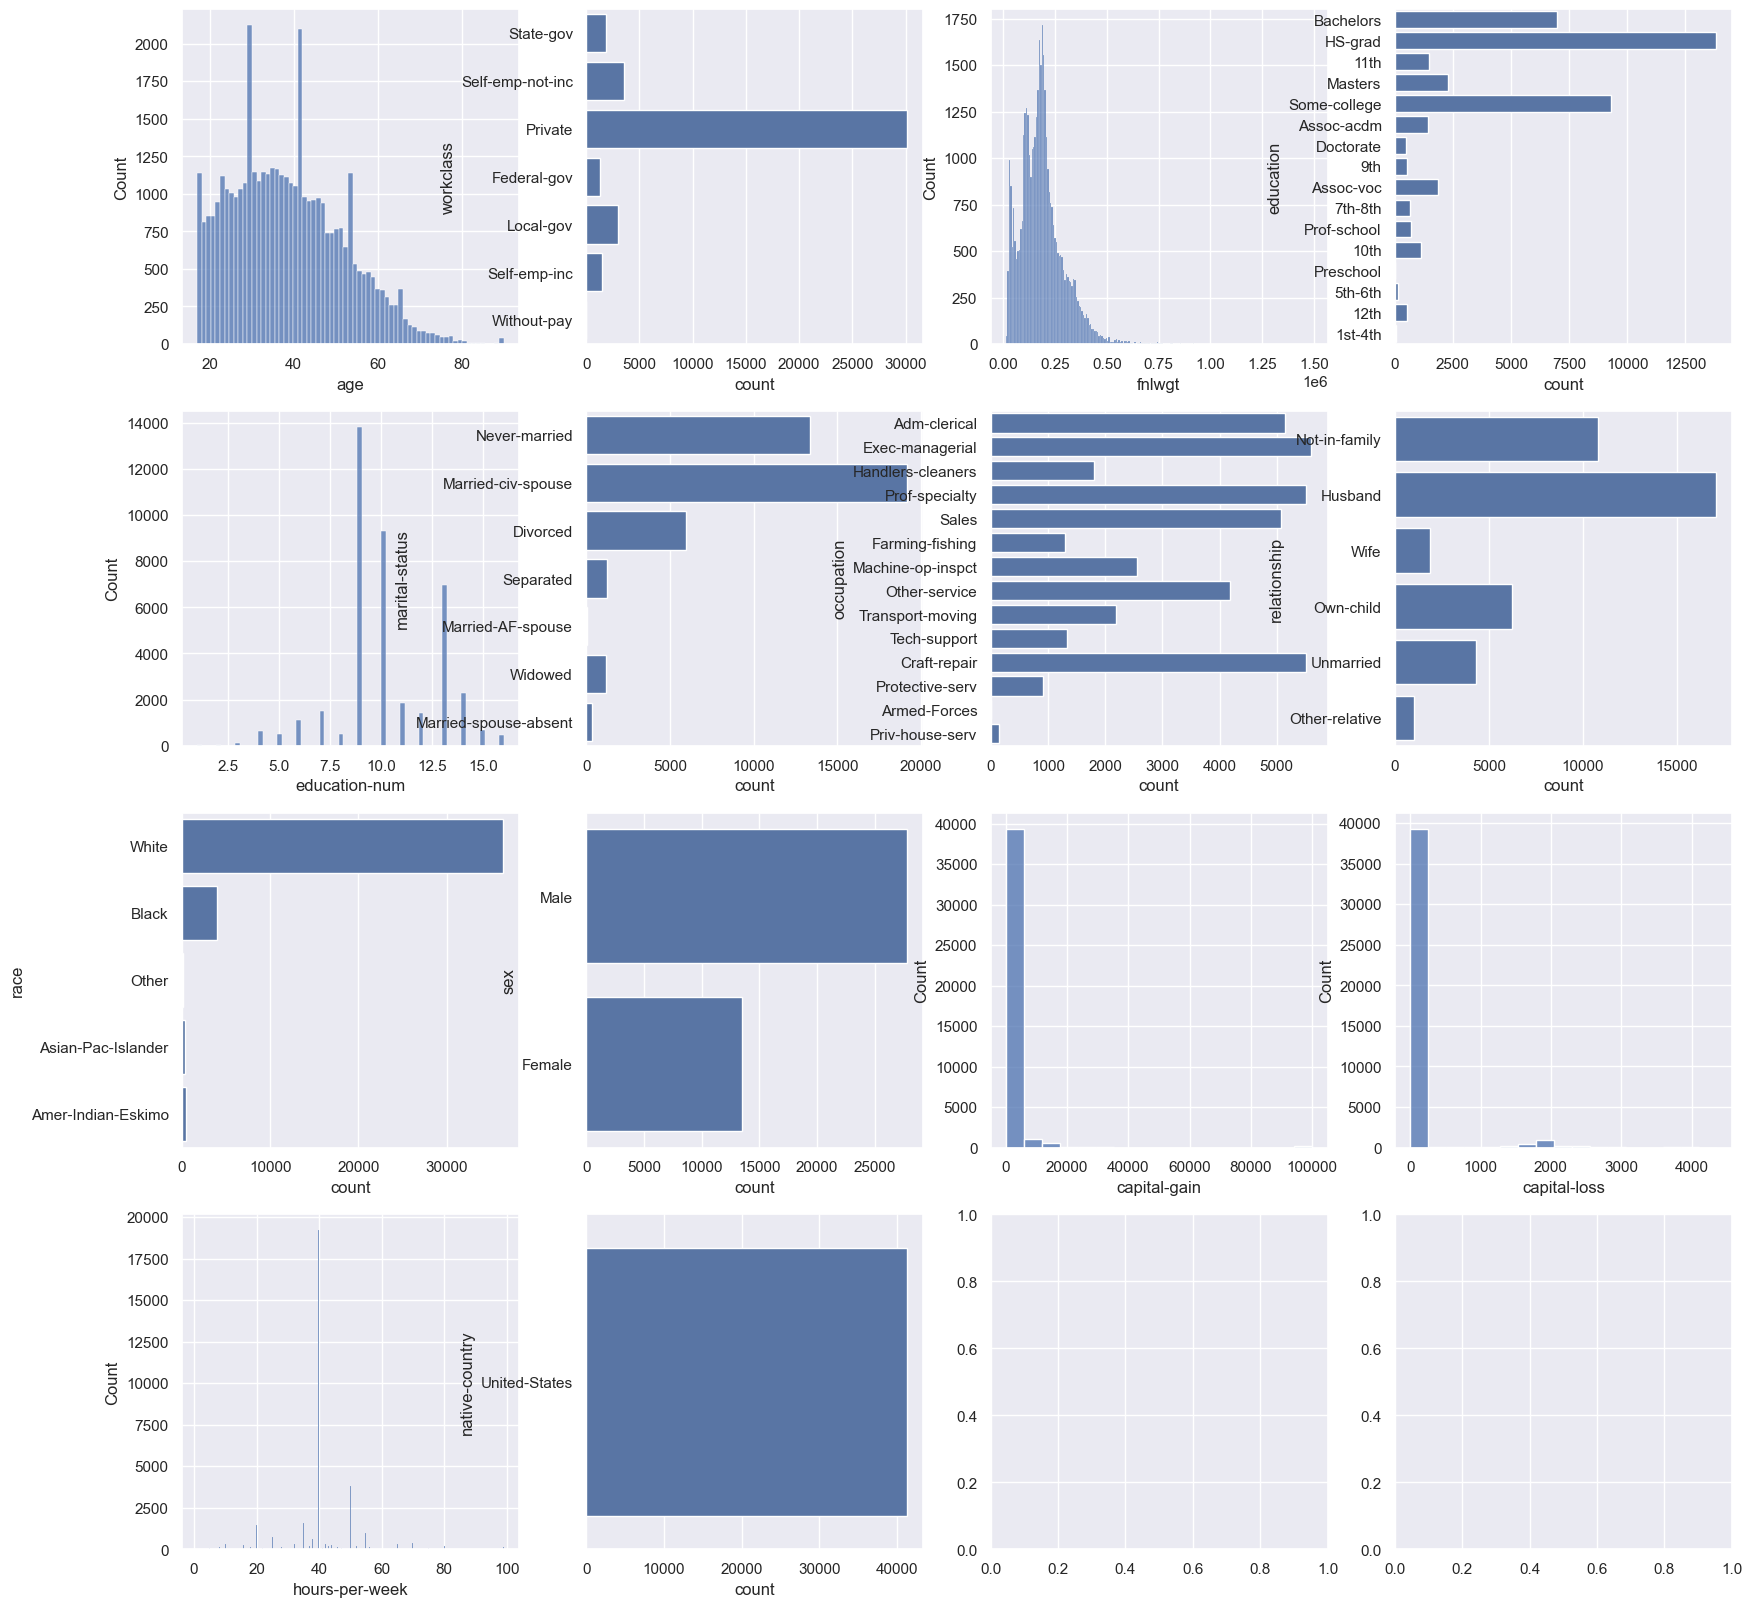

In [25]:
X_eda = X_eda.query('`native-country` == "United-States"')
plot_distrb(X_eda)

<Axes: >

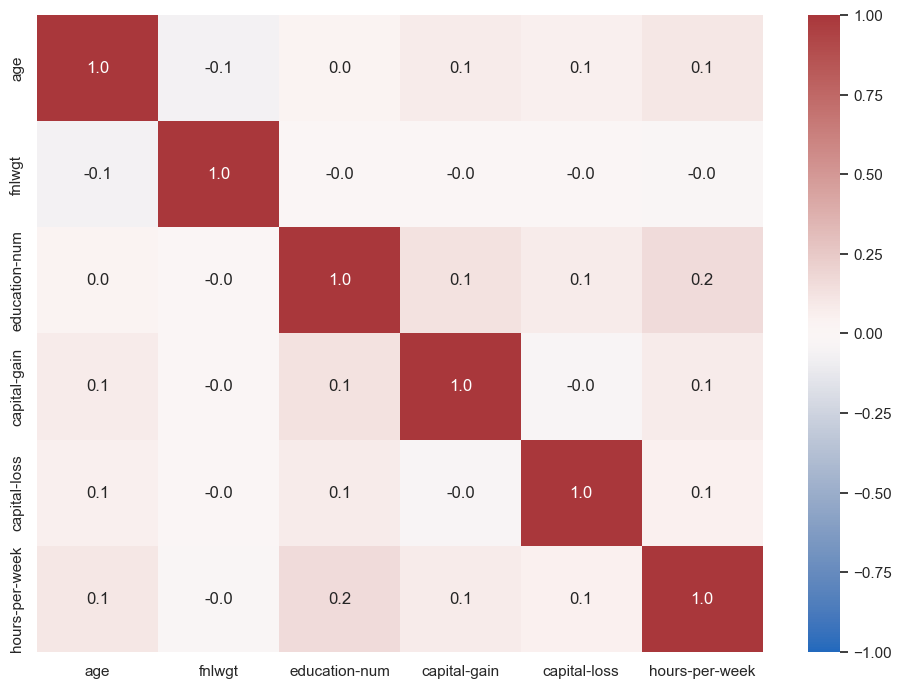

In [26]:
sns.heatmap(X_eda[num_cols].corr(),annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')

In [27]:
X_melt = X_eda.melt(id_vars=['age', 'sex'], 
                    var_name='metric')

In [28]:

X_int_melt = X_melt.query('metric in @num_cols')

In [29]:
X_int_melt

,age,sex,metric,value
41292,39,Male,fnlwgt,77516
41293,50,Male,fnlwgt,83311
41294,38,Male,fnlwgt,215646
41295,53,Male,fnlwgt,234721
41296,37,Female,fnlwgt,284582
...,...,...,...,...
454207,33,Male,hours-per-week,40
454208,39,Female,hours-per-week,36
454209,38,Male,hours-per-week,50
454210,44,Male,hours-per-week,40


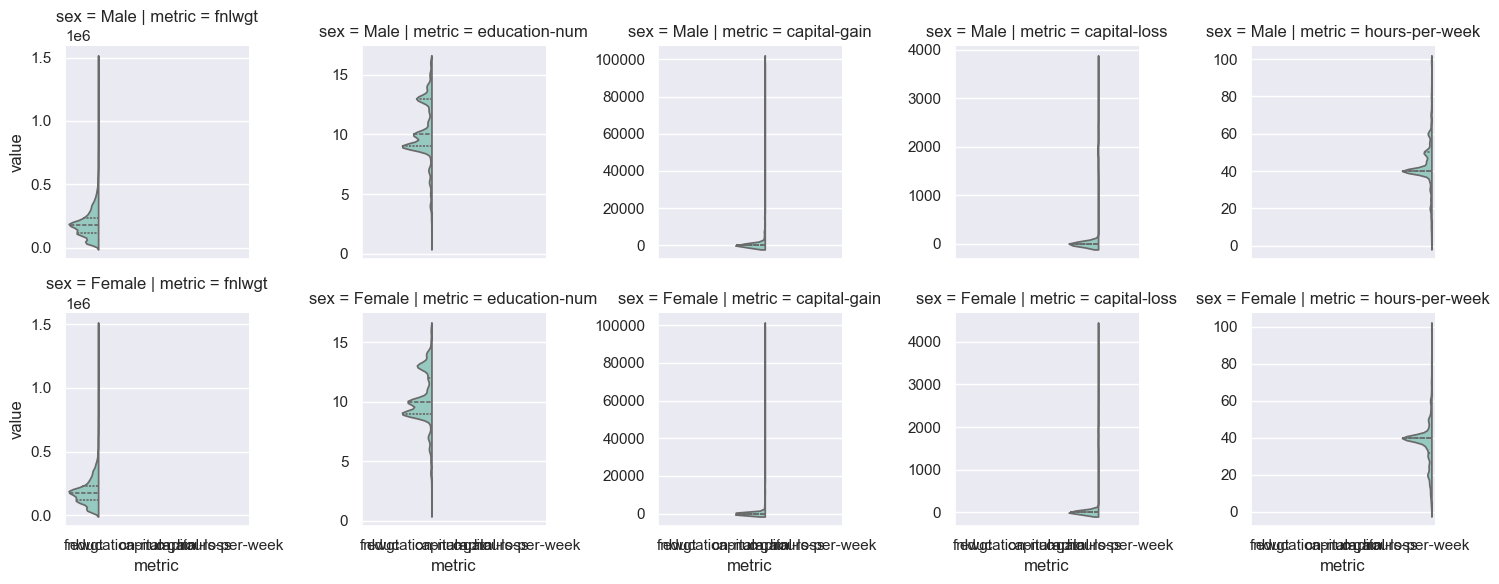

In [30]:

def _violinplot(x, y, hue,  **kwargs):
    """
    https://stackoverflow.com/a/44035405/6931113

    x: pd.series
    """
    sns.violinplot(x=x, y=y, hue=hue, **kwargs)

g = sns.FacetGrid(X_int_melt, row="sex", col='metric', sharey=False)
g.map(_violinplot, 'metric', 'value',  'sex', split=True, inner="quart", palette="Set3", legend=True)

In [31]:
cols = ['age', 'sex'] + cat_cols.tolist()
X_cat_melt = X_melt.query('metric in @cat_cols')

In [32]:
def _countplot(x, hue, palette='dark:#4c72b0', **kwargs):
    """
    https://stackoverflow.com/a/44035405/6931113

    x: pd.series
    """
    sns.countplot(x=x, hue=hue, palette=palette, **kwargs)

    
def plot_countplot(X_melt):
    """
        https://stackoverflow.com/a/69813924/6931113
    """
    g = sns.FacetGrid(X_melt, col="metric")
    g.map(_countplot, "value", "sex", stat='percent')
    # g.set_xticklabels(['No', 'Yes'])
    g.set_titles("metric = {col_name}")
    g.set_axis_labels("", "Percentage")
    g.add_legend()
    # g.fig.subplots_adjust(wspace=.02)
    # g.fig.suptitle('Countplot of X_melt by metric')
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    return ax


In [33]:
X_cat_melt


,age,sex,metric,value
0,39,Male,workclass,State-gov
1,50,Male,workclass,Self-emp-not-inc
2,38,Male,workclass,Private
3,53,Male,workclass,Private
4,37,Female,workclass,Private
...,...,...,...,...
495499,33,Male,native-country,United-States
495500,39,Female,native-country,United-States
495501,38,Male,native-country,United-States
495502,44,Male,native-country,United-States


<Axes: title={'center': 'metric = native-country'}>

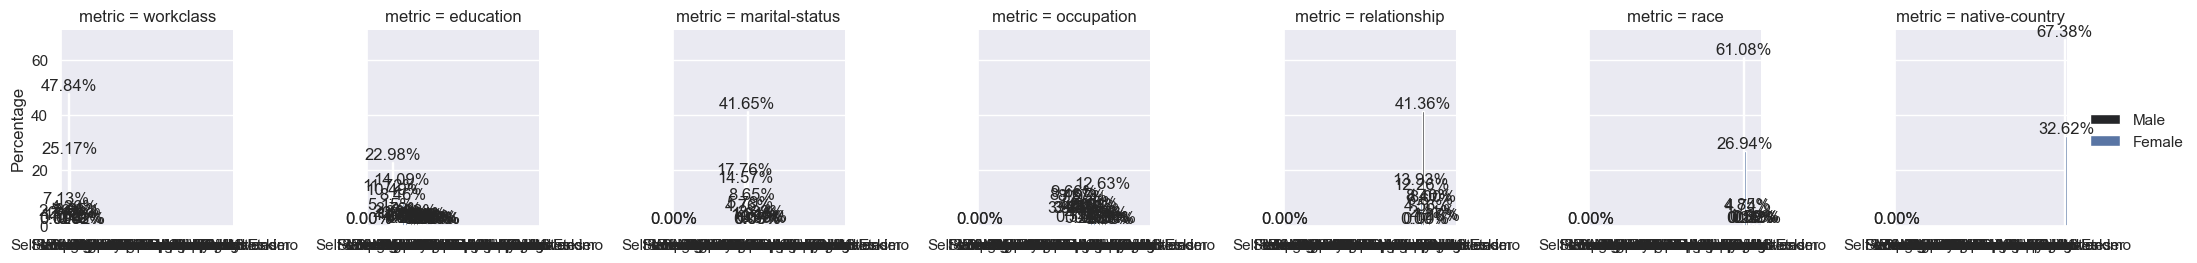

In [34]:
plot_countplot(X_cat_melt)